In [38]:
# type: ignore , so it doesnt report missing import
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # disable info and warning messages
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
%matplotlib inline
print(tf.__version__)

2.13.1


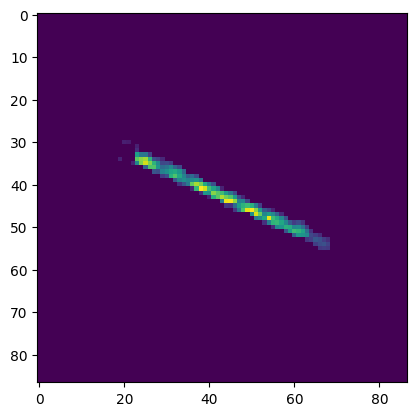

Min and max pixel values: 0.0 197.0


In [39]:
# Open an image file
img = Image.open(
    "/home/helix/mldataset/cropped/ConfirmedFiles/BE0001_20191109_163736_645878_detected/images/FF_BE0001_20191109_180114_106_0122624_2.png"
)
# Convert the image data to a numpy array
img_array = np.array(img, dtype=np.float32)
IMG_DIM = 64
resize_and_rescale = tf.keras.Sequential(
    [layers.Resizing(IMG_DIM, IMG_DIM), layers.Rescaling(1.0 / 255)]
)
# print(img_array.shape)
# Display the image
# img_array=np.expand_dims(img_array, axis=0)

plt.imshow(img_array)
plt.show()
img_array = np.expand_dims(img_array, axis=-1)
print("Min and max pixel values:", img_array.min(), img_array.max())

Min and max pixel values: 0.0 0.7530683
Min and max pixel values: 0.0 1.0


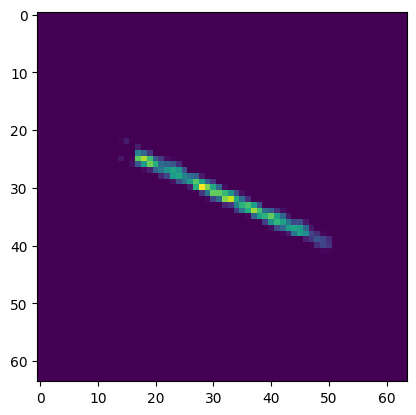

In [40]:
res = resize_and_rescale(img_array)
print("Min and max pixel values:", res.numpy().min(), res.numpy().max())

res /= res.numpy().max()
print("Min and max pixel values:", res.numpy().min(), res.numpy().max())
plt.imshow(res)
plt.show()

Number of images: 1000
Mean: 81.325
Median: 64.0
Min: 46
Max: 707


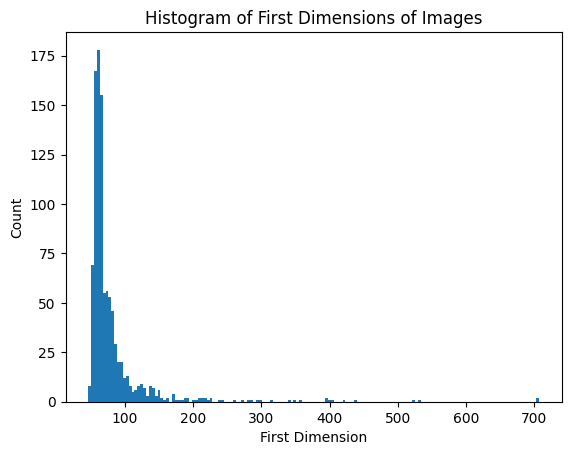

In [41]:
dirs = [
    "/home/helix/mldataset/cropped/ConfirmedFiles",
    "/home/helix/mldataset/cropped/RejectedFiles",
]
dimensions = []

for i in dirs:
    for j in os.listdir(i):
        imgs = os.path.join(i, j, "images")

        for img in os.listdir(imgs):

            img = os.path.join(imgs, img)

            img = Image.open(img)
            img_array = np.array(img)
            dimensions.append(img_array.shape[0])
            img_array = np.expand_dims(img_array, axis=-1)

print("Number of images:", len(dimensions))
print("Mean:", np.mean(dimensions))
print("Median:", np.median(dimensions))
print("Min:", np.min(dimensions))
print("Max:", np.max(dimensions))
plt.hist(dimensions, bins="auto")

plt.xlabel("First Dimension")
plt.ylabel("Count")
plt.title("Histogram of First Dimensions of Images")
plt.show()

In [42]:
train_ds,val_ds = tf.keras.utils.image_dataset_from_directory(
    "/home/helix/mldataset/cropped",
    label_mode="binary",
    color_mode="grayscale",
    batch_size=32,
    validation_split=0.2,
    subset="both",
    seed=123,
    image_size=(64, 64),
)

Found 1000 files belonging to 2 classes.
Using 800 files for training.
Using 200 files for validation.


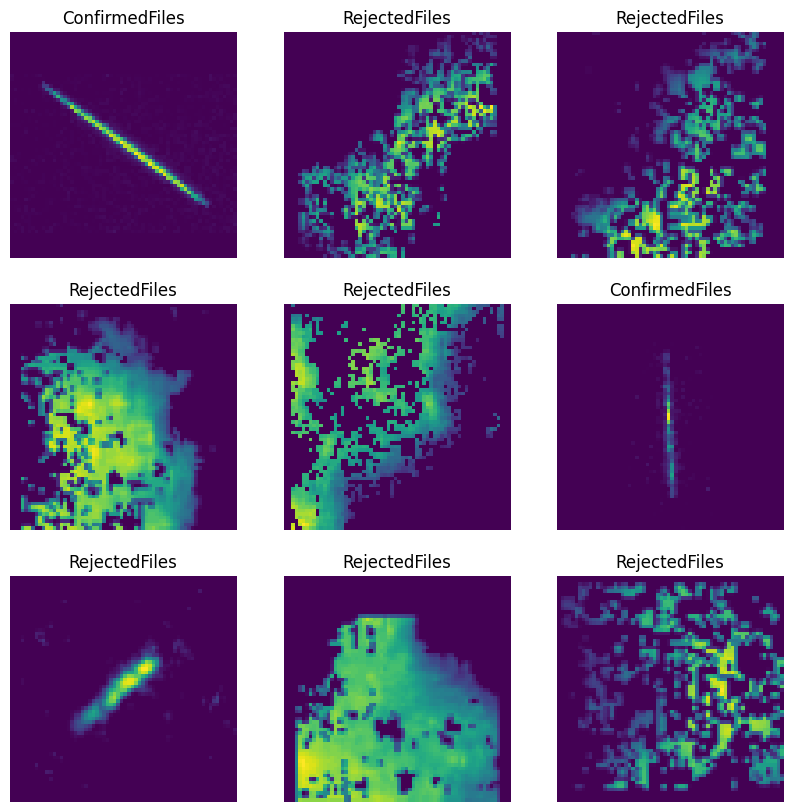

In [45]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[int(labels[i])])
    plt.axis("off")

In [47]:
dirs = [
    #"/home/helix/mldataset/cropped/ConfirmedFiles",
    "/home/helix/mldataset/cropped/RejectedFiles",
]
dimensions = []
ct=0
for i in dirs:
    for j in os.listdir(i):
        imgs = os.path.join(i, j, "images")

        ct+=len(os.listdir(imgs))
print(ct)

782
